# Exploratory Analysis

In [70]:
import numpy as np
import hickle as hkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import rasterio as rs
import os
import sys
sys.path.append('../src/')
import ptype_prepare_data as pp
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
unknowns = df[df.PLANTATION == 255]
# for every plot that has unknown labels, assert all labels are unknown
for plot in set(list(unknowns.PLOT_ID)):
    assert len(unknowns[unknowns.PLOT_ID == plot]) == 196,\
    f'{plot} has {len(unknowns[unknowns.PLOT_ID == plot])}/196 points labeled unknown.'

In [84]:
df_new = df.drop(df[df.PLANTATION == 255].index)
print(f'{int((len(df) - len(df_new)) / 196)} plots labeled unknown were dropped.')

22 plots labeled unknown were dropped.


In [85]:
plot_ids = []

In [86]:
# now create list of plot_ids
plot_ids += df_new.PLOT_FNAME.drop_duplicates().tolist()
plot_ids

[20002,
 20003,
 20004,
 20005,
 20006,
 20007,
 20008,
 20009,
 20010,
 20011,
 20012,
 20013,
 20014,
 20015,
 20016,
 20018,
 20019,
 20020,
 20021,
 20022,
 20023,
 20024,
 20025,
 20026,
 20028,
 20029,
 20030,
 20031,
 20032,
 20034,
 20035,
 20038,
 20039,
 20041,
 20042,
 20043,
 20044,
 20045,
 20046,
 20047,
 20048,
 20049,
 20050,
 20051,
 20053,
 20054,
 20055,
 20056,
 20057,
 20058,
 20059,
 20060,
 20061,
 20063,
 20064,
 20065,
 20066,
 20067,
 20068,
 20070,
 20071,
 20072,
 20073,
 20074,
 20075,
 20076,
 20077,
 20078,
 20079,
 20080,
 20082,
 20083,
 20084,
 20085,
 20086,
 20087,
 20088,
 20089,
 20090,
 20091,
 20092,
 20093,
 20094,
 20095,
 20096,
 20097,
 20103,
 20104,
 20105,
 20106,
 20107,
 20108,
 20109,
 20110,
 20111,
 20112,
 20113,
 20114,
 20116,
 20117,
 20118,
 20119,
 20121,
 20122,
 20123,
 20124,
 20125,
 20126,
 20127,
 20129,
 20130,
 20131,
 20132,
 20133,
 20134,
 20135,
 20136,
 20137,
 20140,
 20141,
 20142,
 20143,
 20144,
 20145,
 20146,


In [87]:
len(plot_ids)

139

In [88]:
plot_ids = [str(item).zfill(5) if len(str(item)) < 5 else str(item) for item in plot_ids]
plot_ids

['20002',
 '20003',
 '20004',
 '20005',
 '20006',
 '20007',
 '20008',
 '20009',
 '20010',
 '20011',
 '20012',
 '20013',
 '20014',
 '20015',
 '20016',
 '20018',
 '20019',
 '20020',
 '20021',
 '20022',
 '20023',
 '20024',
 '20025',
 '20026',
 '20028',
 '20029',
 '20030',
 '20031',
 '20032',
 '20034',
 '20035',
 '20038',
 '20039',
 '20041',
 '20042',
 '20043',
 '20044',
 '20045',
 '20046',
 '20047',
 '20048',
 '20049',
 '20050',
 '20051',
 '20053',
 '20054',
 '20055',
 '20056',
 '20057',
 '20058',
 '20059',
 '20060',
 '20061',
 '20063',
 '20064',
 '20065',
 '20066',
 '20067',
 '20068',
 '20070',
 '20071',
 '20072',
 '20073',
 '20074',
 '20075',
 '20076',
 '20077',
 '20078',
 '20079',
 '20080',
 '20082',
 '20083',
 '20084',
 '20085',
 '20086',
 '20087',
 '20088',
 '20089',
 '20090',
 '20091',
 '20092',
 '20093',
 '20094',
 '20095',
 '20096',
 '20097',
 '20103',
 '20104',
 '20105',
 '20106',
 '20107',
 '20108',
 '20109',
 '20110',
 '20111',
 '20112',
 '20113',
 '20114',
 '20116',
 '20117',


In [89]:
# check and remove any plot ids where there are no cloud free images (no s2 hkl file)

no_s2 = []
updated_plots = [plot for plot in plot_ids if os.path.exists(f'../data/train-s2/{plot}.hkl')]


In [90]:
# for v8 should not have 08182
# for v20 should not have
# 11 are dropped properly one is not
updated_plots

['20002',
 '20003',
 '20004',
 '20005',
 '20006',
 '20007',
 '20008',
 '20009',
 '20010',
 '20011',
 '20012',
 '20013',
 '20014',
 '20015',
 '20016',
 '20018',
 '20019',
 '20020',
 '20021',
 '20022',
 '20023',
 '20024',
 '20025',
 '20026',
 '20028',
 '20029',
 '20030',
 '20031',
 '20032',
 '20034',
 '20035',
 '20038',
 '20039',
 '20041',
 '20042',
 '20043',
 '20044',
 '20045',
 '20046',
 '20048',
 '20049',
 '20050',
 '20051',
 '20053',
 '20054',
 '20055',
 '20057',
 '20063',
 '20064',
 '20065',
 '20067',
 '20068',
 '20070',
 '20071',
 '20072',
 '20073',
 '20074',
 '20075',
 '20076',
 '20077',
 '20078',
 '20079',
 '20080',
 '20082',
 '20083',
 '20084',
 '20085',
 '20086',
 '20087',
 '20088',
 '20089',
 '20090',
 '20091',
 '20092',
 '20093',
 '20094',
 '20095',
 '20096',
 '20097',
 '20103',
 '20105',
 '20106',
 '20107',
 '20108',
 '20109',
 '20110',
 '20111',
 '20112',
 '20113',
 '20114',
 '20116',
 '20119',
 '20122',
 '20124',
 '20125',
 '20126',
 '20129',
 '20130',
 '20131',
 '20132',


In [ ]:
    # if '08182' in plot_ids: plot_ids.remove('08182')
for plot in plot_ids:
    if not os.path.exists(f'../data/train-s2/{plot}.hkl'.strip()):
        print(f'Plot id {plot} has no cloud free imagery and will be removed.')
        no_s2.append(plot)
        plot_ids.remove(plot)

            

for plot in plot_ids[:]:            
    s2_check = os.path.exists(f'../data/train-s2/{plot}.hkl')
    if s2_check == False:
        print(f'Plot id {plot} has no cloud free imagery and will be removed.')
        
        plot_ids.remove(plot)

# Training Data Separation

## t-SNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique used to investigate or evaluate segmentation. Here we are using it as a way to understand separation in the training data.  

### Unscaled Data

In [93]:
X, y = pp.create_xy(['v17'], 
                    classes='binary', 
                    drop_prob=False, 
                    drop_feats=False, 
                    feature_select=[],
                    verbose=True)

Plot id 170078 has no cloud free imagery and will be removed.
Plot id 170098 has no cloud free imagery and will be removed.
Plot id 1700100 has no cloud free imagery and will be removed.
Training data includes 147 plots.
Class count {0.0: 28812}


In [59]:
df = pd.DataFrame(columns=['y','comp-1', 'comp-2'])
n_samples = len(X.shape[0])

for plot in range(n_samples):
    
    X_ = X[plot, ...]
    X_re = X_.reshape(X_.shape[0]*X_.shape[1],X_.shape[2])
    y_ = y[plot, ...]
    y_re = y_.reshape(y_.shape[0]*y_.shape[1])
    
    # n components defines the num of target dims
    # using default perplexity of 30
    tsne = TSNE(n_components=2, verbose=1, random_state=22)
    z = tsne.fit_transform(X_re) 
    
    for a, b, c in zip(y_re, z[:,0], z[:,1]):
        df = df.append({'y': a, 
                       'comp-1': b,
                       'comp-2': c},
                       ignore_index=True)

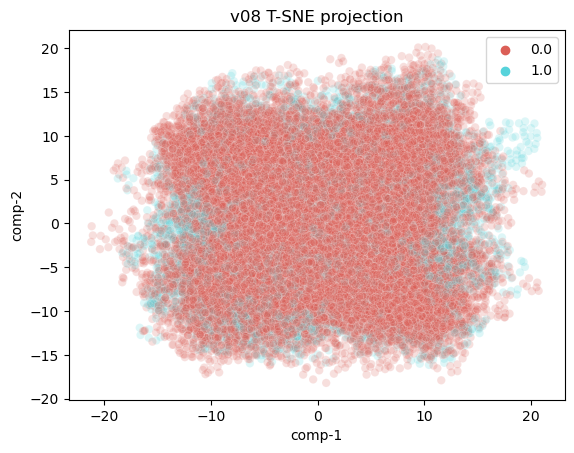

In [33]:
# Class count {0.0: 25095, 1.0: 16653} 
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=v08.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", 2),
                data=v08).set(title="v08 T-SNE projection");

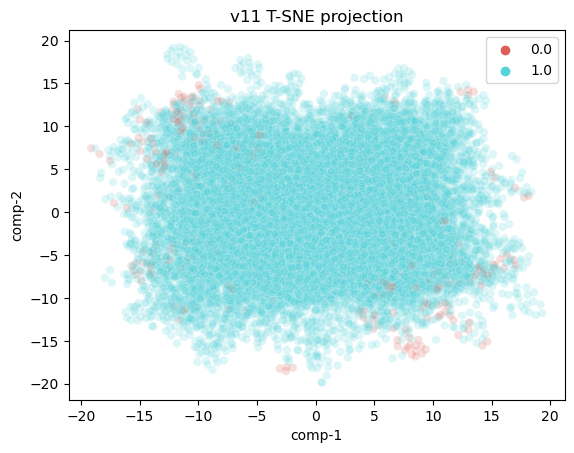

In [29]:
# Class count {0.0: 299, 1.0: 19301}
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=v11.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", 2),
                data=v11).set(title="v11 T-SNE projection");

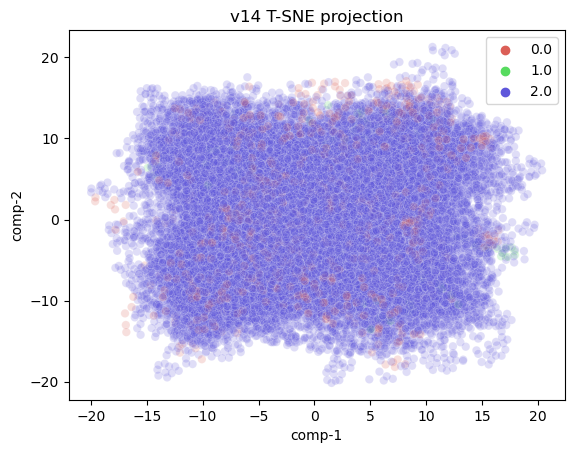

In [15]:
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=v14.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", 3),
                data=v14).set(title="v14 T-SNE projection");

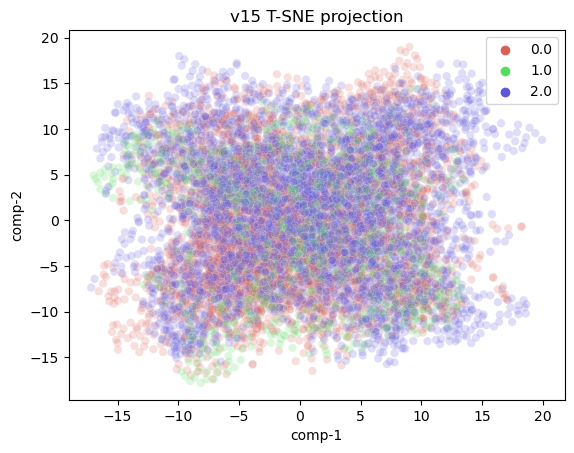

In [19]:
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=v15.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", 3),
                data=v15).set(title="v15 T-SNE projection");

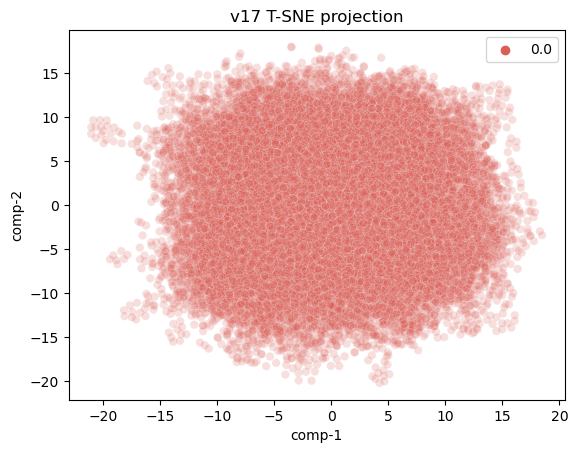

In [25]:
# this one is only natural forest
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=v17.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", 1),
                data=v17).set(title="v17 T-SNE projection");

### Scaled data

In [75]:
def tsne_visual(v_train_data, classes, scaling):
    
    X, y = pp.create_xy([v_train_data], 
                        classes=classes, 
                        drop_prob=False, 
                        drop_feats=False, 
                        feature_select=[],
                        verbose=True)

    # scale the data
    if scaling:
        for band in range(0, X.shape[-1]):

                mins = np.percentile(X[..., band], 1)
                maxs = np.percentile(X[..., band], 99)

                if maxs > mins:

                    # clip values in each band based on min/max of training dataset
                    X[..., band] = np.clip(X[..., band], mins, maxs)

                    # calculate standardized data
                    midrange = (maxs + mins) / 2
                    rng = maxs - mins
                    X_std = (X[..., band] - midrange) / (rng / 2)

                    # update each band in X to hold standardized data
                    X[..., band] = X_std

    df = pd.DataFrame(columns=['y','comp-1', 'comp-2'])
    n_samples = X.shape[0]

    for plot in range(n_samples):

        X_ = X[plot, ...]
        X_re = X_.reshape(X_.shape[0]*X_.shape[1],X_.shape[2])
        y_ = y[plot, ...]
        y_re = y_.reshape(y_.shape[0]*y_.shape[1])

        # n components defines the num of target dims
        # using default perplexity of 30
        tsne = TSNE(n_components=2, verbose=1, random_state=22)
        z = tsne.fit_transform(X_re) 

        for a, b, c in zip(y_re, z[:,0], z[:,1]):
            df = df.append({'y': a, 
                           'comp-1': b,
                           'comp-2': c},
                           ignore_index=True)    
    return df

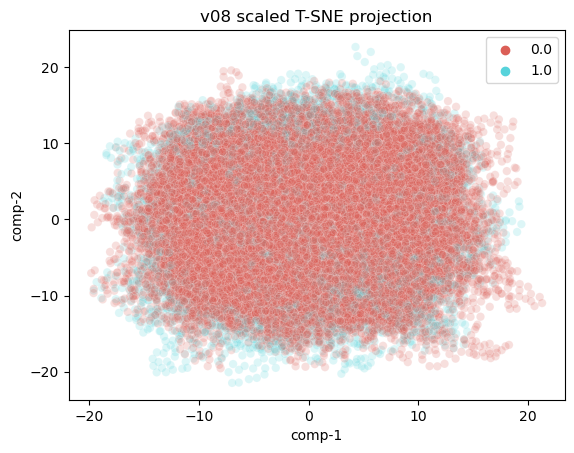

In [40]:
# uses default perplexity (30)
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=df.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="v08 scaled T-SNE projection");

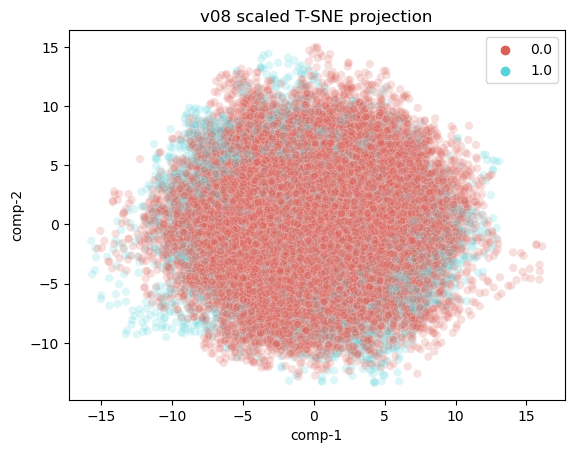

In [72]:
## Uses perplexity of 45
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=v08_sc.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", len(np.unique(v08_sc.y))),
                data=v08_sc).set(title="v08 scaled T-SNE projection");

In [56]:
v11_sc = tsne_visual('v11', 'binary', True)

Training data includes 100 plots.
Class count {0.0: 299, 1.0: 19301}
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.575865
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.117256
[t-SNE] KL divergence after 950 iterations: 0.518761
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.184184
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.824348
[t-SNE] KL divergence after 900 iterations: 0.590442
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t

[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.023689
[t-SNE] KL divergence after 1000 iterations: 0.450506
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.237735
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.834557
[t-SNE] KL divergence after 1000 iterations: 0.514711
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.887361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.144135
[t-SNE] KL divergence after 700 iterations: 0.406009
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.006s...
[t

[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.502472
[t-SNE] KL divergence after 900 iterations: 0.447820
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.237801
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.435345
[t-SNE] KL divergence after 1000 iterations: 0.603472
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.617076
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.397202
[t-SNE] KL divergence after 1000 iterations: 0.361266
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.006s...
[t

[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.559753
[t-SNE] KL divergence after 950 iterations: 0.534418
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.150017
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.895458
[t-SNE] KL divergence after 800 iterations: 0.680770
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.345821
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.041264
[t-SNE] KL divergence after 1000 iterations: 0.383523
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.005s...
[t-

[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.118954
[t-SNE] KL divergence after 1000 iterations: 0.617383
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.135301
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.524670
[t-SNE] KL divergence after 1000 iterations: 0.712256
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 1.531545
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.239632
[t-SNE] KL divergence after 1000 iterations: 0.525229
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.005s...
[

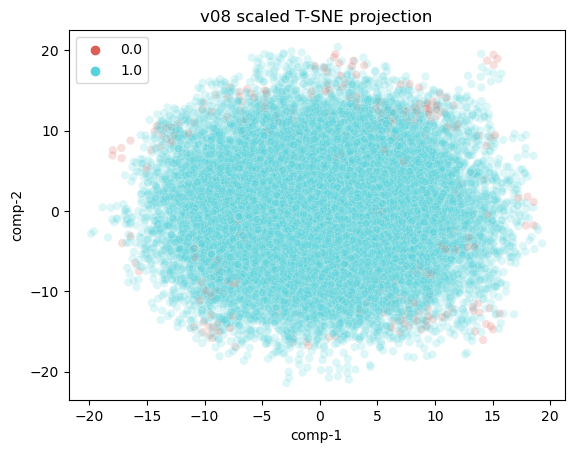

In [57]:
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=v11_sc.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", len(np.unique(v11_sc.y))),
                data=v11_sc).set(title="v08 scaled T-SNE projection");

## PCA
As a sanity check, and considering t-sne doesn't appear to work well, try running a Principle Component Analysis (PCA) to reduce the data to two dimensions. PCA is sensitive to scale so input features are scaled prior to fitting.

In [85]:
X, y = pp.create_xy(['v15'], 
                        classes='multi', 
                        drop_prob=False, 
                        drop_feats=False, 
                        feature_select=[],
                        verbose=True)

for band in range(0, X.shape[-1]):

    mins = np.percentile(X[..., band], 1)
    maxs = np.percentile(X[..., band], 99)

    if maxs > mins:

        # clip values in each band based on min/max of training dataset
        X[..., band] = np.clip(X[..., band], mins, maxs)

        # calculate standardized data
        midrange = (maxs + mins) / 2
        rng = maxs - mins
        X_std = (X[..., band] - midrange) / (rng / 2)

        # update each band in X to hold standardized data
        X[..., band] = X_std
        

2.0 plots labeled unknown were dropped.
Training data includes 48 plots.
Class count {0.0: 4065, 1.0: 1167, 2.0: 4176}


In [86]:
df = pd.DataFrame(columns=['y','comp-1', 'comp-2'])
n_samples = X.shape[0]

for plot in range(n_samples):

    X_ = X[plot, ...]
    
    X_re = X_.reshape(X_.shape[0]*X_.shape[1],X_.shape[2])
    y_ = y[plot, ...]
    y_re = y_.reshape(y_.shape[0]*y_.shape[1])

    # n components defines the num of target dims
    # using default perplexity of 30
    pca = PCA(n_components=2, random_state=22)
    z = pca.fit_transform(X_re) 

    for a, b, c in zip(y_re, z[:,0], z[:,1]):
        df = df.append({'y': a, 
                       'comp-1': b,
                       'comp-2': c},
                       ignore_index=True)  

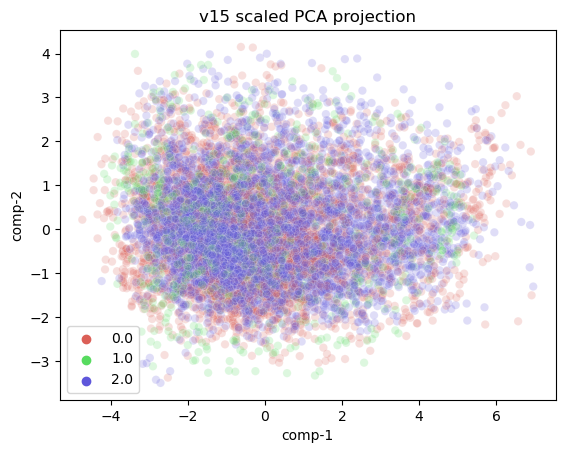

In [87]:
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=df.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", len(np.unique(df.y))),
                data=df).set(title="v15 scaled PCA projection");

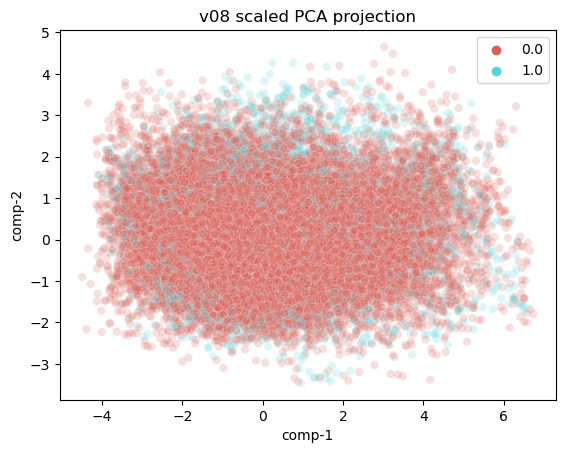

In [78]:
sns.scatterplot(x="comp-1", 
                y="comp-2", 
                hue=df.y.tolist(),
                alpha=0.2,
                palette=sns.color_palette("hls", len(np.unique(df.y))),
                data=df).set(title="v08 scaled PCA projection");

## Conclusions
* We would expect (hope for) greater separation between the 1 and 0 classes for v08 and v11, which have binary plantation / non-plantation labels. We anticipate the model will struggle with separating 0, 1 and 2 classes for v14 and v15. Overall, this exercise shows little to no ability to separate between classes.
  
_Other tests performed:_  
* In the event t-sne is sensitive to the varying scales of the input features, the analysis is performed with scaled and unscaled data. No differences in the output visualization were documented when scaling is applied to v08 and v11.
* In the event the incorrect perplexity value was selected, a range of values were tested for v08 (including 5, 30 and 45). Increasing the perplexity to 45 reduced the spread of the data but didn't impact cluster separability. No significant differences in the output visualization were documented when perplexity values were changed.
* In the event there's an error in the t-sne analysis, PCA is applied to the data to reduce it to two dimensions. This also gives bad results, which indicates the data is not very structured.

### References
https://lvdmaaten.github.io/tsne/  
https://crunchingthedata.com/when-to-use-t-sne/#:~:text=Like%20many%20other%20dimension%20reduction,undue%20influence%20on%20the%20results.  

# Comparison / Integration of Analysis Ready Data (ARD)

In [82]:
# check out a couple of examples
def multiplot(matrices, cbarmin, cbarmax,  nrows = 13, ncols = 6):
    '''Docstring
    
         Parameters:
          matrices (list):
          nrows (int):
          
         Returns:
          None
          
          credit: John Brandt
    '''
    fig, axs = plt.subplots(ncols = ncols, nrows = nrows)
    fig.set_size_inches(18, 3.25*nrows)
    
    to_iter = [[x for x in range(i, i + ncols + 1)] for i in range(0, nrows*ncols, ncols)]
    counter = 0
    for r in range(1, nrows + 1):
        min_i = min(to_iter[r-1])
        max_i = max(to_iter[r-1])
        
        for i in range(ncols):
            sns.heatmap(data = matrices[..., counter], ax = axs[r - 1, i], cbar = True, 
                        vmin=cbarmin, vmax=cbarmax,
                       cmap = sns.color_palette("viridis", as_cmap=True))
            axs[r - 1, i].set_xlabel("")
            axs[r - 1, i].set_ylabel("")
            axs[r - 1, i].set_yticks([])
            axs[r - 1, i].set_xticks([])
            counter += 1
        
    plt.show

In [3]:
## Check ard
country = 'ghana'
x=1667
y=1077
ard = hkl.load(f'../tmp/{country}/{str(x)}/{str(y)}/ard/{str(x)}X{str(y)}_ard.hkl')
ard.shape

(618, 614, 13)

## Sentinel-2

In [33]:
#(1668, 1076)
# load my processed s2, dem, s1 data
my_s2 = hkl.load('../data/processed_files/s2_ghana.hkl')
my_s1 = hkl.load('../data/processed_files/s1_ghana.hkl')
my_dem = hkl.load('../data/processed_files/dem_ghana.hkl')
my_s2.shape, my_s1.shape, my_dem.shape

((618, 614, 10), (618, 614, 2), (618, 614))

In [34]:
# load ARD and separate into s2, dem, s1
ard = hkl.load('../data/1668X1076_ard.hkl')
ard_s2 = ard[..., 0:10]
ard_dem = ard[..., 10:11]
ard_s1 = ard[..., 11:13]
ard.shape

(618, 614, 13)

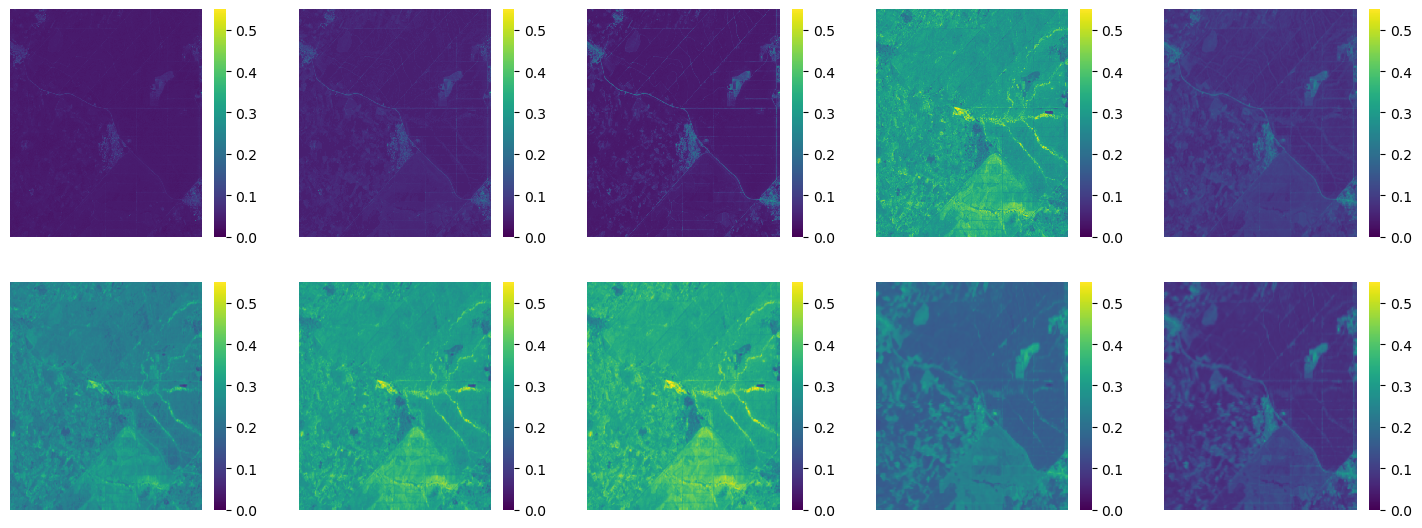

In [120]:
multiplot(my_s2, 0, 0.55, 2, 5)

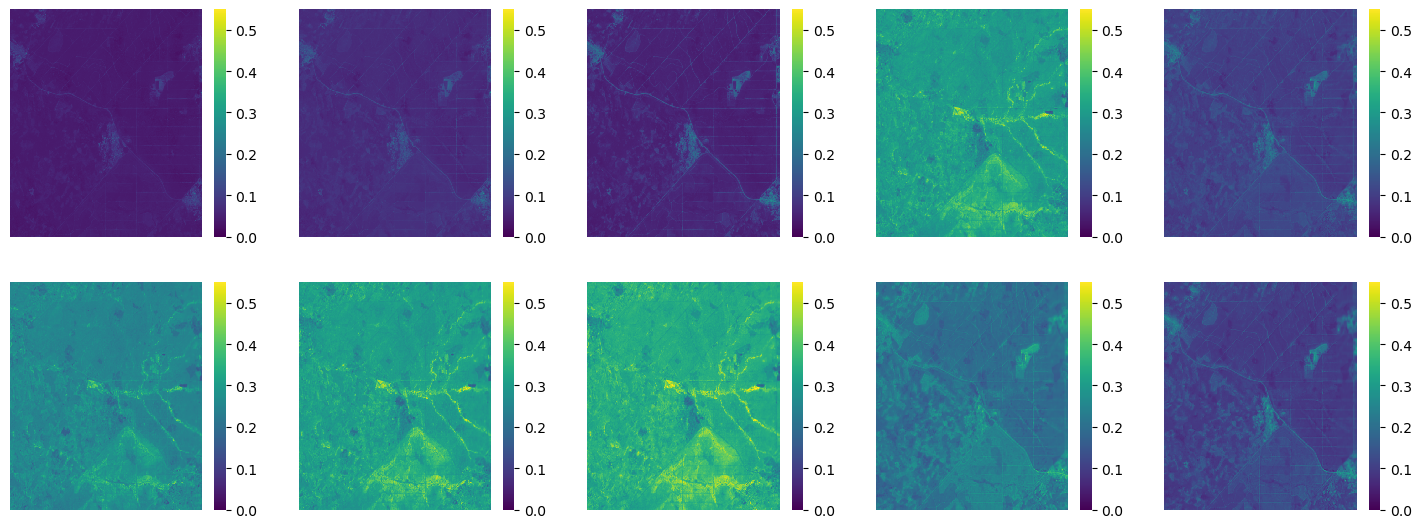

In [84]:
multiplot(ard_s2, 0, 0.55, 2, 5)

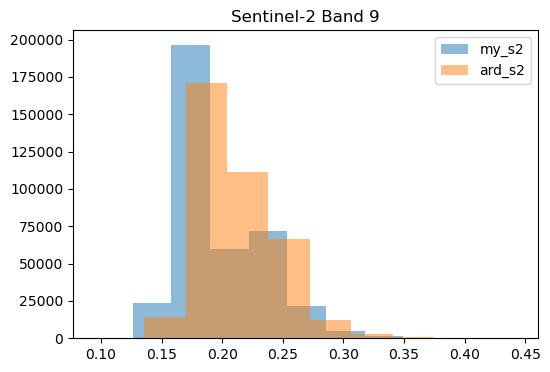

In [37]:
plt.figure(figsize=(6,4))
plt.hist(my_s2[...,8].flatten(), alpha=0.5, label='my_s2')
plt.hist(ard_s2[...,8].flatten(), alpha=0.5, label='ard_s2')
plt.legend(loc='upper right')
plt.title('Sentinel-2 Band 9');

## Sentinel-1

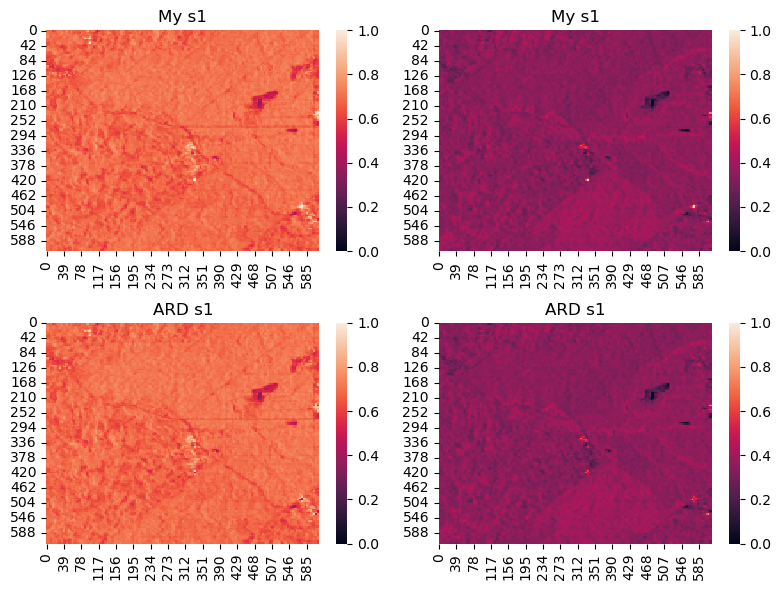

In [124]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.heatmap(my_s1[...,0], vmin=0, vmax=1).set_title('My s1')
plt.subplot(2,2,2)
sns.heatmap(my_s1[...,1], vmin=0, vmax=1).set_title('My s1')
plt.subplot(2,2,3)
sns.heatmap(ard_s1[...,0], vmin=0, vmax=1).set_title('ARD s1')
plt.subplot(2,2,4)
sns.heatmap(ard_s1[...,1], vmin=0, vmax=1).set_title('ARD s1')
plt.tight_layout();

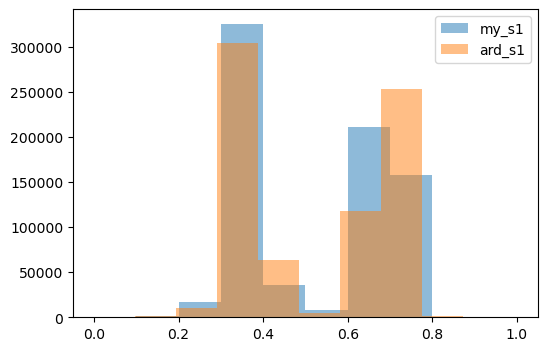

In [125]:
plt.figure(figsize=(6,4))
plt.hist(my_s1.flatten(), alpha=0.5, label='my_s1')
plt.hist(ard_s1.flatten(), alpha=0.5, label='ard_s1')
plt.legend(loc='upper right');

## DEM

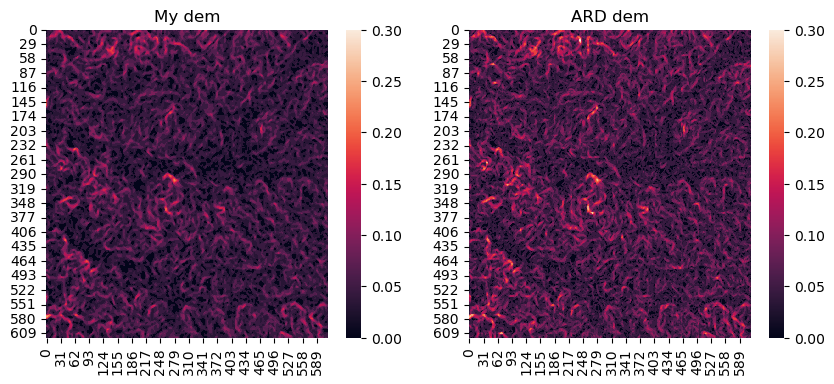

In [111]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(my_dem, vmin=0, vmax=.3).set_title('My dem')
plt.subplot(1,2,2)
sns.heatmap(ard_dem[...,0], vmin=0, vmax=.3).set_title('ARD dem');

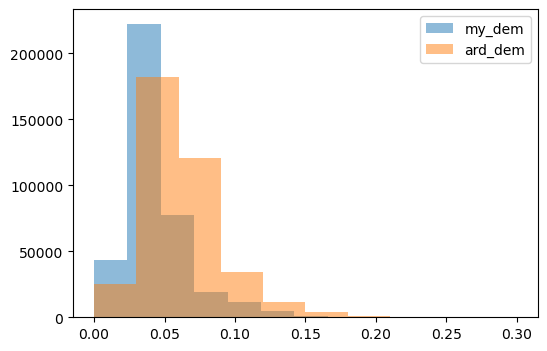

In [117]:
plt.figure(figsize=(6,4))
plt.hist(my_dem.flatten(), alpha=0.5, label='my_dem')
plt.hist(ard_dem[...,0].flatten(), alpha=0.5, label='ard_dem')
plt.legend(loc='upper right');

## Texture

In [73]:
# is the texture calc the same?
# pay note to the different cbar values
x=1667
y=1077
ard_txt = np.load(f'../tmp/ghana/{str(x)}/{str(y)}/raw/feats/{str(x)}X{str(y)}Y_txt_ard.npy')
my_txt = np.load(f'../tmp/ghana/{str(x)}/{str(y)}/raw/feats/{str(x)}X{str(y)}Y_txtv19.npy')

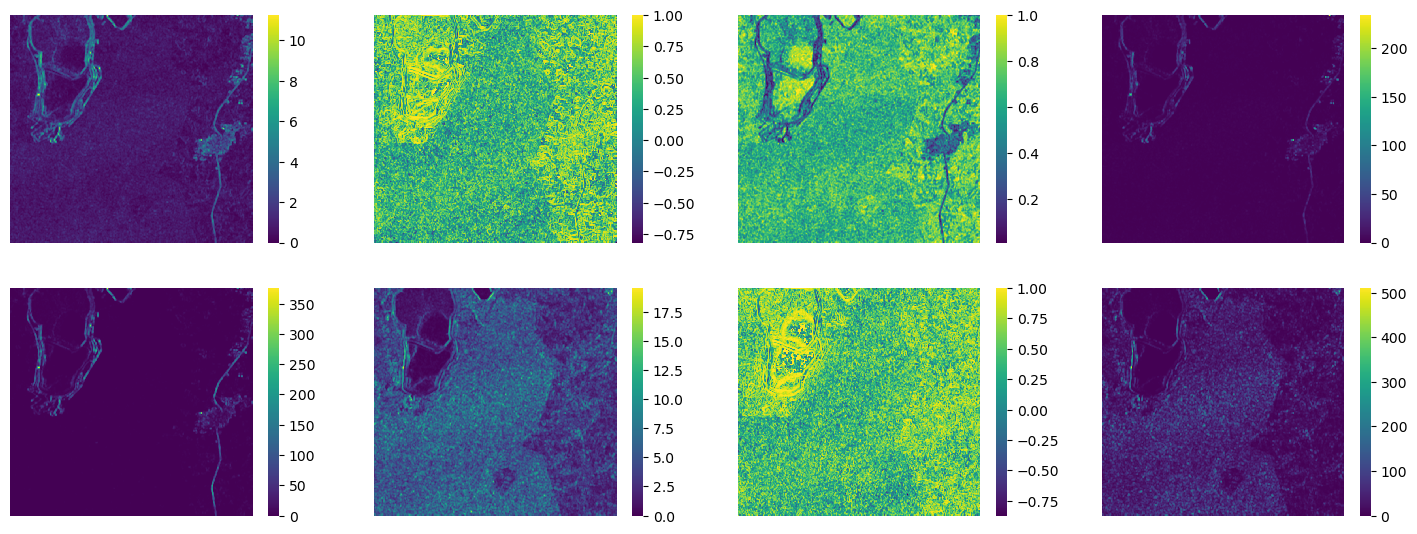

In [75]:
multiplot(my_txt, 2, 4)

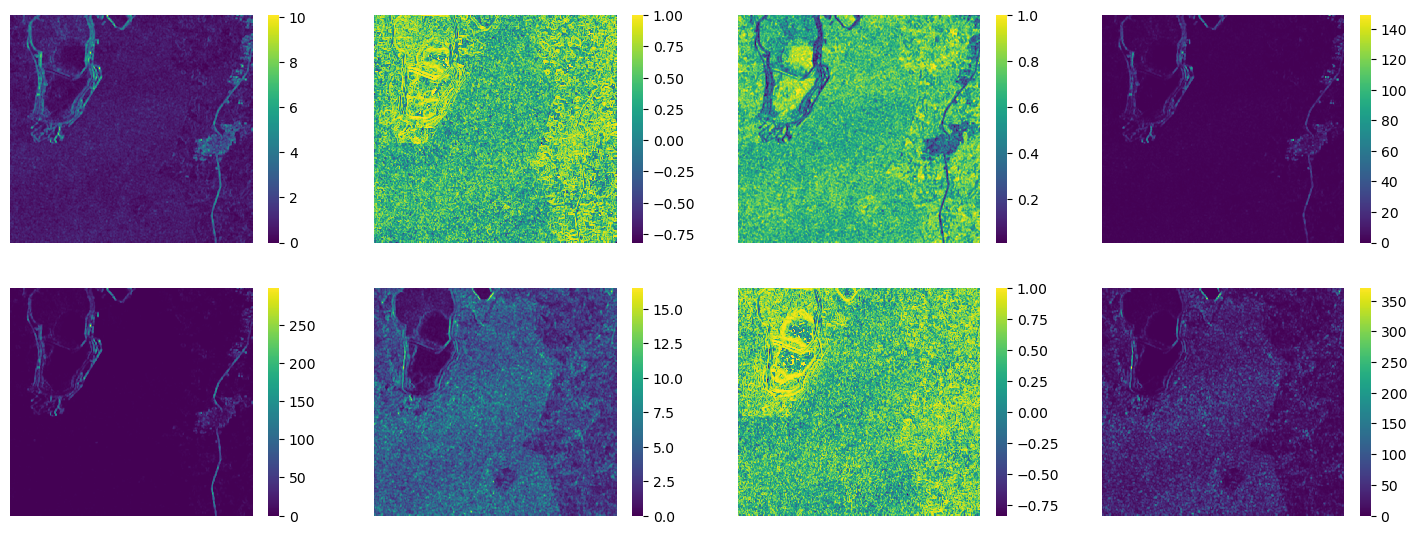

In [76]:
multiplot(ard_txt, 2, 4)

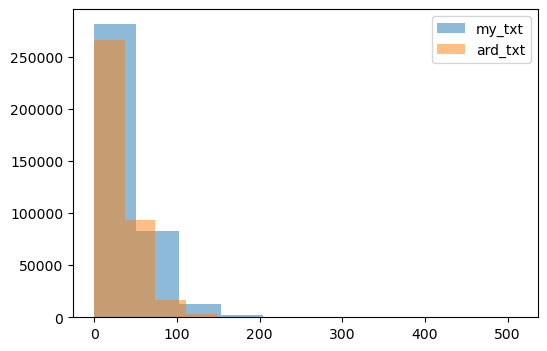

In [123]:
# the last texture indx (nir contrast) is the most important for cat_v19
plt.figure(figsize=(6,4))
plt.hist(my_txt[...,-1].flatten(), alpha=0.5, label='my_txt')
plt.hist(ard_txt[...,-1].flatten(), alpha=0.5, label='ard_txt')
plt.legend(loc='upper right');

## Predictions

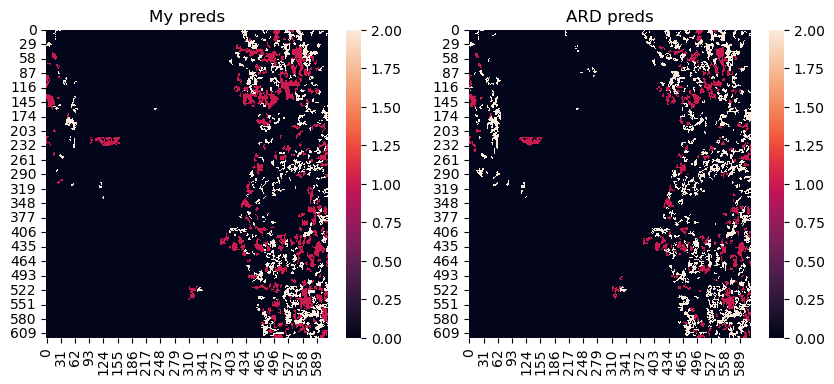

In [27]:
# are the predictions the same?
x=1667
y=1077
ard_preds = rs.open(f'../tmp/ghana/preds/{str(x)}X{str(y)}Y_preds_ARD.tif').read(1)
my_preds = rs.open(f'../tmp/ghana/preds/{str(x)}X{str(y)}Y_preds.tif').read(1)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(my_preds, vmin=0, vmax=2).set_title('My preds')
plt.subplot(1,2,2)
sns.heatmap(ard_preds, vmin=0, vmax=2).set_title('ARD preds');

In [28]:
my_counts = np.unique(my_preds, return_counts=True)
total = sum(my_counts[1])
print(f'non plantation: %{(my_counts[1][0]/total)*100}')
print(f'monoculture: %{(my_counts[1][1]/total)*100}')
print(f'agroforestry: %{(my_counts[1][2]/total)*100}')
print('-----')
ard_counts = np.unique(ard_preds, return_counts=True)
total = sum(ard_counts[1])
print(f'non plantation: %{(ard_counts[1][0]/total)*100}')
print(f'monoculture: %{(ard_counts[1][1]/total)*100}')
print(f'agroforestry: %{(ard_counts[1][2]/total)*100}')

non plantation: %90.6104065863403
monoculture: %5.132665001106859
agroforestry: %4.256928412552839
-----
non plantation: %90.76747520107945
monoculture: %3.2836827846473335
agroforestry: %5.9488420142732155


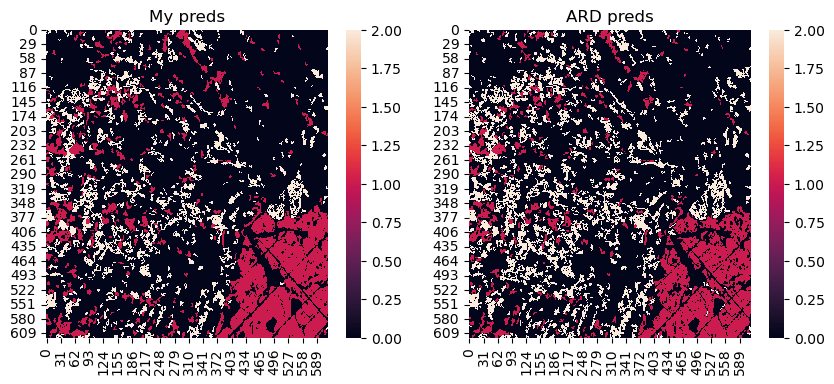

In [29]:
# test with one more tile
x=1668
y=1077
ard_preds = rs.open(f'../tmp/ghana/preds/{str(x)}X{str(y)}Y_preds_ARD.tif').read(1)
my_preds = rs.open(f'../tmp/ghana/preds/{str(x)}X{str(y)}Y_preds.tif').read(1)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(my_preds, vmin=0, vmax=2).set_title('My preds')
plt.subplot(1,2,2)
sns.heatmap(ard_preds, vmin=0, vmax=2).set_title('ARD preds');

In [30]:
my_counts = np.unique(my_preds, return_counts=True)
total = sum(my_counts[1])
print(f'non plantation: %{(my_counts[1][0]/total)*100}')
print(f'monoculture: %{(my_counts[1][1]/total)*100}')
print(f'agroforestry: %{(my_counts[1][2]/total)*100}')
print('-----')
ard_counts = np.unique(ard_preds, return_counts=True)
total = sum(ard_counts[1])
print(f'non plantation: %{(ard_counts[1][0]/total)*100}')
print(f'monoculture: %{(ard_counts[1][1]/total)*100}')
print(f'agroforestry: %{(ard_counts[1][2]/total)*100}')

non plantation: %72.6302668058147
monoculture: %15.980677397931753
agroforestry: %11.389055796253544
-----
non plantation: %70.53698491508807
monoculture: %13.392207710066096
agroforestry: %16.07080737484583


In [10]:
## Swap out inputs and run predictions
# ARD S2, ARD S1, my DEM
# ARD S1, ARD DEM, my S2
# ARD S2, ARD DEM, my S1

# dem_only = rs.open('../tmp/ghana/preds/1667X1077Y_preds_ARD_DEM.tif').read(1)
# s1_only = rs.open('../tmp/ghana/preds/1667X1077Y_preds_ARD_s1.tif').read(1)

# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.heatmap(dem_only).set_title('DEM')
# plt.subplot(1,2,2)
# sns.heatmap(s1_only, vmin=0, vmax=2).set_title('s1');


In [11]:
# s2_only = rs.open('../tmp/ghana/preds/1667X1077Y_preds_ARD_s2.tif').read(1)
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.heatmap(s2_only).set_title('s2');